In [1]:
!python friedmann equations.py

python: can't open file '/Users/joanalnu/Library/Mobile Documents/com~apple~CloudDocs/research/dark-energy-theory/to-sort-out/LCDM/friedmann': [Errno 2] No such file or directory


In [2]:
import pandas as pd

def read_data():
    """
    Read the Friedmann equation data from a CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the Friedmann equation data.
    """
    # Replace 'friedmann_data.csv' with the path to your CSV file
    df = pd.read_csv('cosmological_distances.csv')
    return df

data = read_data()

In [3]:
import matplotlib.pyplot as plt
def plot_distances(df, xaxis='Redshift (z)'):
    """
    Plot the distances from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    # plt.plot(df['Big Bang to z Travel Time (Gyr)'].iloc[0:1194], df['Comoving Distance (Mpc)'].iloc[0:1194], label='Comoving')
    plt.plot(df[xaxis].iloc[0:1000], df['Luminosity Distance (Mpc)'].iloc[0:1000], label='Luminosity')
    plt.plot(df[xaxis].iloc[0:1000], df['Proper Distance (Mpc)'].iloc[0:1000], label='Proper')
    plt.plot(df[xaxis].iloc[0:1000], df['Angular Distance (Mpc)'].iloc[0:1000], label='Angular')
    plt.title(f'Distances vs {xaxis}')
    plt.xlabel(f'{xaxis}')
    plt.ylabel(r'Distances ($Mpc$)')
    plt.loglog()
    plt.legend()
    plt.grid()
    return plt

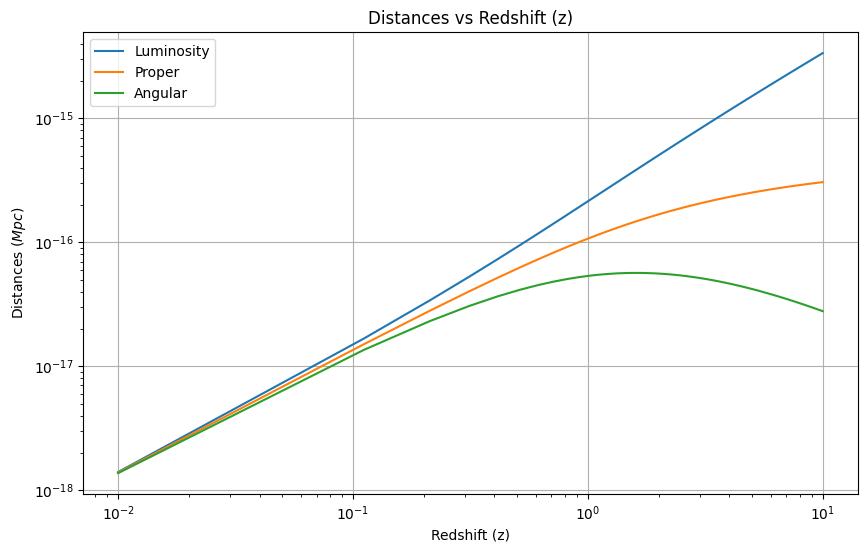

In [4]:
figure = plot_distances(data)

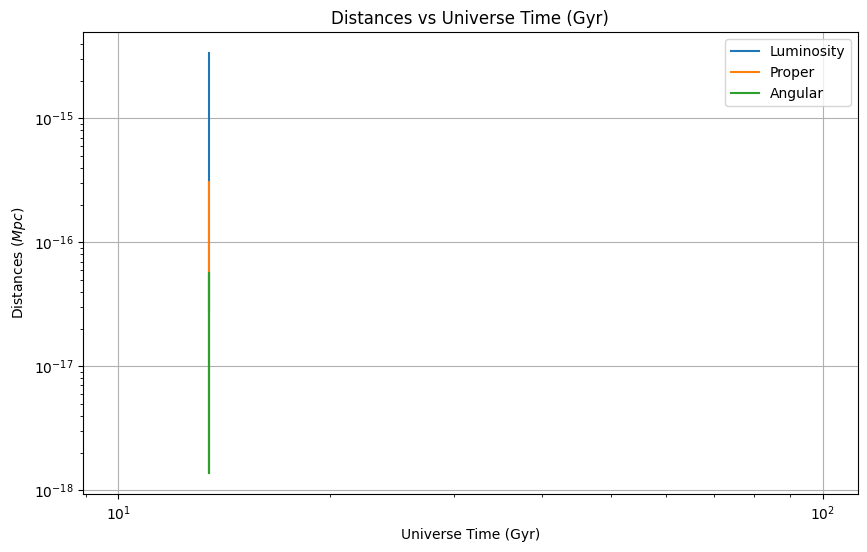

In [5]:
figure = plot_distances(data, xaxis='Universe Time (Gyr)')

# Time - Redshift

In [6]:
def plot_time_vs_redshift(df):
    """
    Plot the time vs redshift from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(df['Redshift (z)'].iloc[0:1000], df['Big Bang to z Travel Time (Gyr)'].iloc[0:1000], label='Big Bang to now')
    plt.title('Time vs Redshift')
    plt.xlabel('Redshift (z)')
    plt.ylabel('Time (Gyr)')
    plt.legend()
    plt.grid()
    return plt

(0.0, 10.0)

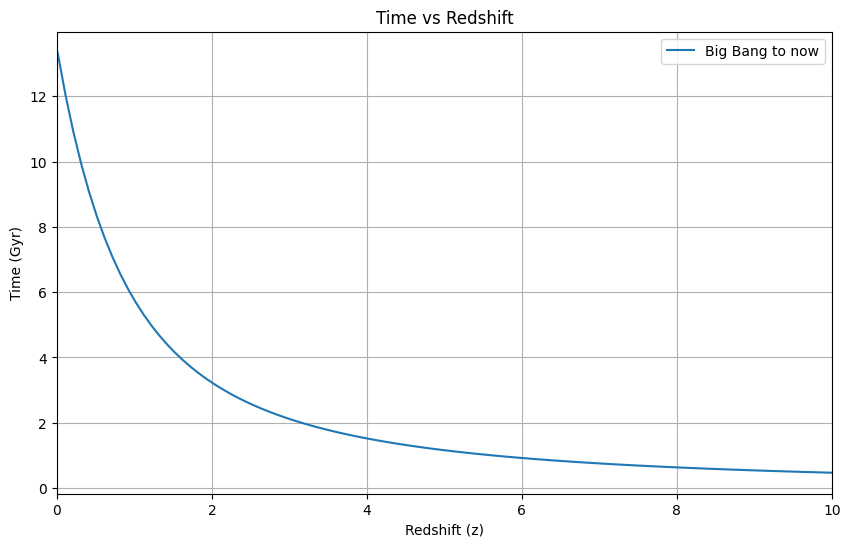

In [7]:
fig = plot_time_vs_redshift(data)
fig.xlim(0, 10)

# Scale Factor - Redshift/Time

In [8]:
def plot_scale_factor(df, xaxis='Light Travel Time (Gyr)'):
    """
    Plot the scale factor from the Friedmann equation data.

    Parameters:
    df (pd.DataFrame): DataFrame containing the Friedmann equation data.
    """
    z = df[xaxis].iloc[0:1000]
    a = 1.0 / (1.0+z) # by definition a(t_0) = 1
    
    plt.figure(figsize=(10, 6))
    plt.plot(z, a, label='Scale Factor')
    plt.title(f'Scale Factor vs {xaxis}')
    plt.xlabel(f'{xaxis}')
    plt.ylabel('Scale Factor')
    plt.legend()
    plt.grid()
    return plt

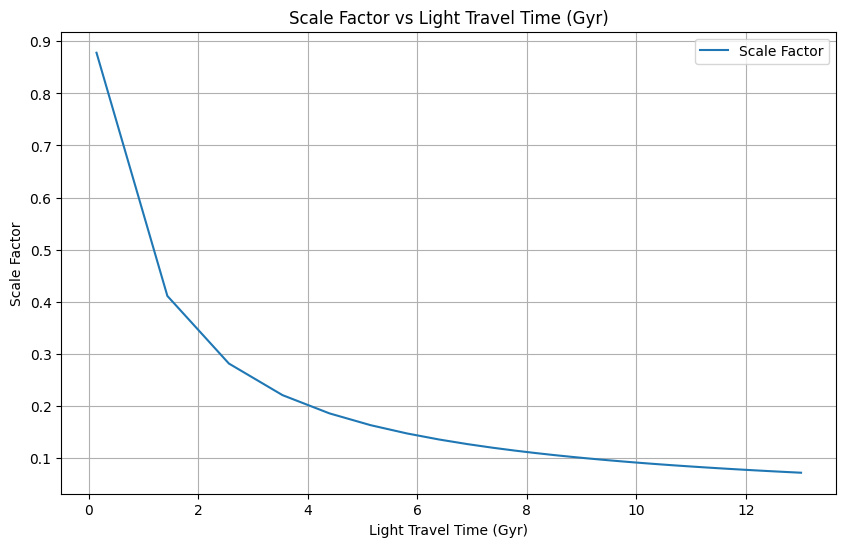

In [9]:
fig = plot_scale_factor(data)

<module 'matplotlib.pyplot' from '/Users/joanalnu/opt/anaconda3/envs/cosmo/lib/python3.14/site-packages/matplotlib/pyplot.py'>

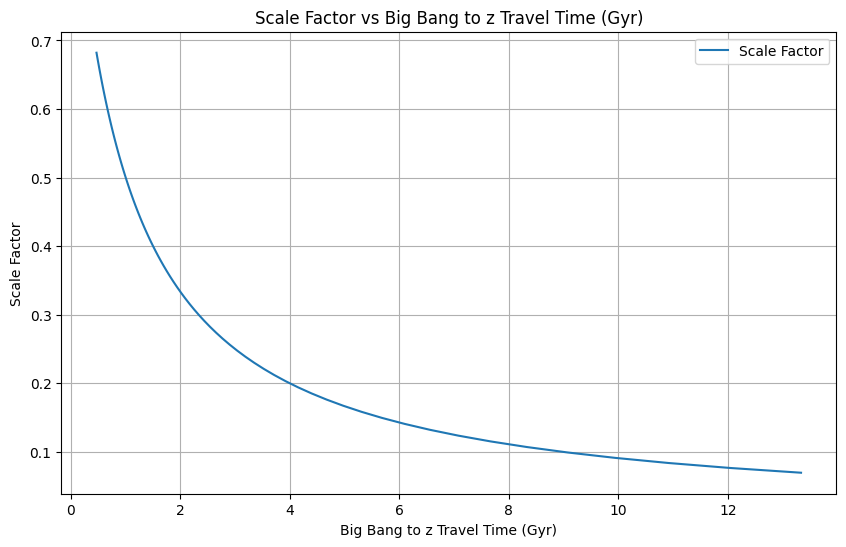

In [10]:
plot_scale_factor(data, xaxis='Big Bang to z Travel Time (Gyr)')

### Discrepancy
This figure shows a discrepancy with the data from [https://github.com/gcanasherrera/CalculadoraCosmologica](https://https://github.com/gcanasherrera/CalculadoraCosmologica).

* How is the time between the Big Bang and $z$ up to $30$ Gyr in Cañas-Herrera's plot?
* Mine is a decreasing function because I have used $a = \frac{1}{1+z}$ and $t \propto z$. However, Cañas-Herrera's plot ain't log function, but it seems to be a polynomial with positive uneven exponent.

**SPOILER** this is successfully solved in the next cell

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_41743/111517807.py:19: RuntimeWarning: invalid value encountered in sqrt
  return 1.0 / (a * np.sqrt(H_sq))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_41743/111517807.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(time_integrand, 0, a, args=(OmegaK))


Time at z=0: 13.48 Gyr


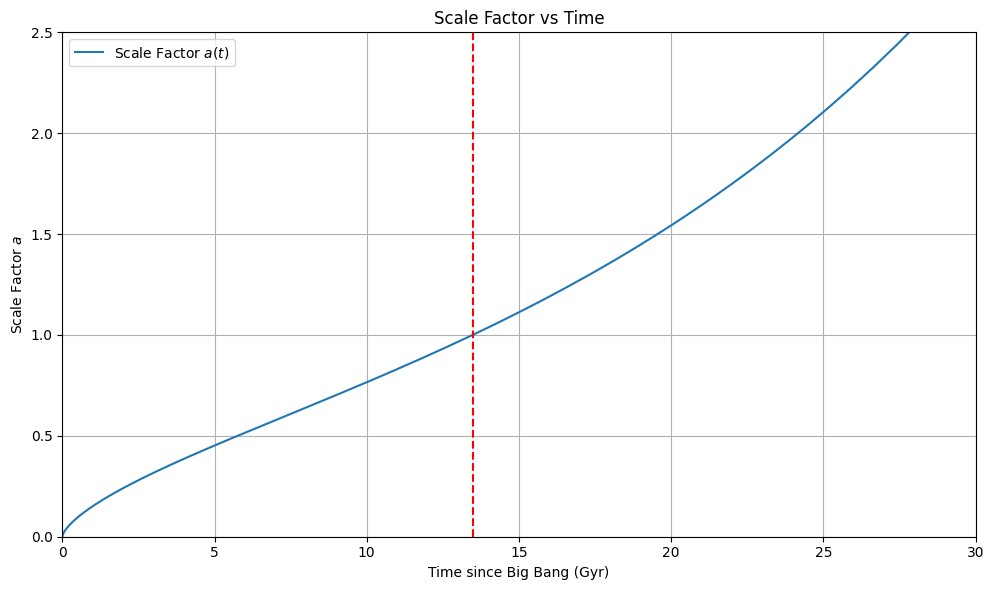

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from parameters import OmegaM, OmegaDE, OmegaR, H0

# Constants
H0_SI = H0 / 3.0857e19  # Convert H0 to s⁻¹
to_gyr = 3.1536e16  # seconds per Gyr

# Redshift and corresponding scale factor
redshift = np.linspace(-1000, 1000, 100000)
a_vals = 1 / (1 + redshift)
OmegaK = 1.0 - (OmegaM + OmegaDE + OmegaR)

# Time from Big Bang to given scale factor a
def cosmic_time_from_big_bang(a, OmegaK):
    def time_integrand(a, OmegaK):
        H_sq = OmegaDE + OmegaM * a**-3 + OmegaR * a**-4 + OmegaK * a**-2
        return 1.0 / (a * np.sqrt(H_sq))
    integral, _ = quad(time_integrand, 0, a, args=(OmegaK))
    return (1 / H0_SI) * integral  # seconds

# Generate time values (one per scale factor)
time_gyr = np.array([cosmic_time_from_big_bang(ai, OmegaK) for ai in a_vals]) / to_gyr  # Gyr

# Plot scale factor vs cosmic time
def plot_scale_factor_with_time():
    plt.figure(figsize=(10, 6))
    plt.plot(time_gyr, a_vals, label='Scale Factor $a(t)$')
    plt.xlabel('Time since Big Bang (Gyr)')
    plt.ylabel('Scale Factor $a$')
    plt.title('Scale Factor vs Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    return plt

fig = plot_scale_factor_with_time()
#fig.yscale('log')

# add line for z = 0
# calculate t for z = 0 and a = 1
a_0 = 1.0
t_0 = cosmic_time_from_big_bang(a_0, OmegaK) / to_gyr  # Gyr
print(f"Time at z=0: {t_0:.2f} Gyr")
fig.axvline(x=t_0, color='r', linestyle='--', label='z = 0')
fig.xlim(0, 30)
fig.ylim(0,2.5)

plt.show()

fig.close()

/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_41743/2584371914.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, _ = quad(time_integrand, epsilon, a, args=(OmegaK))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_41743/2584371914.py:23: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral, _ = quad(time_integrand, epsilon, a, args=(OmegaK))
/var/folders/lq/7_q5kjhn1pzgzvpl0fk8y5mc0000gp/T/ipykernel_41743/2584371914.py:23: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in th

Time at z=0: 13.48 Gyr


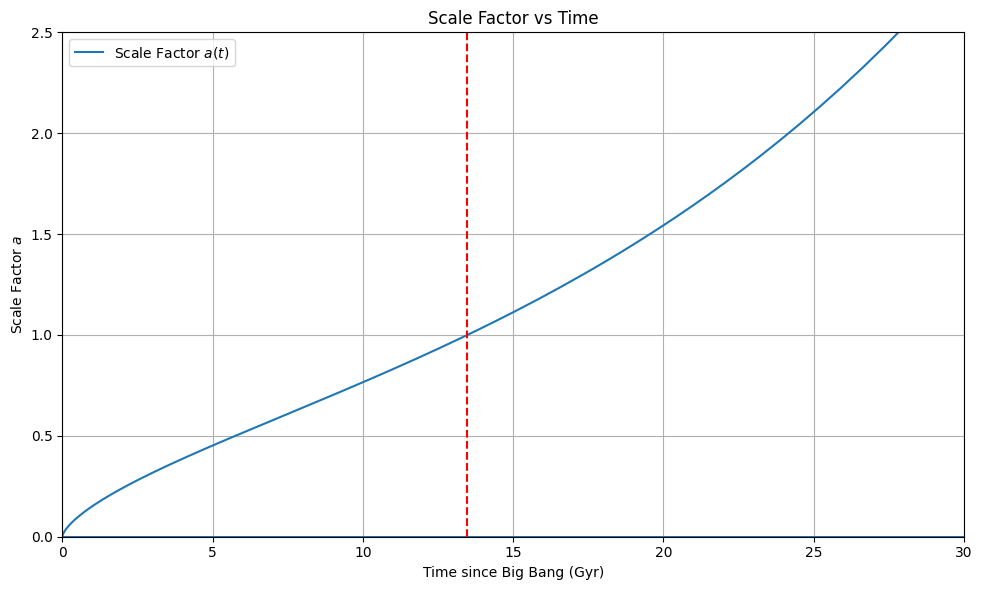

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from parameters import OmegaM, OmegaDE, OmegaR, H0

# Constants
H0_SI = H0 / 3.0857e19  # Convert H0 to s⁻¹
to_gyr = 3.1536e16  # seconds per Gyr

# Redshift and corresponding scale factor
redshift = np.linspace(-1000, 1000, 100000)
a_vals = 1 / (1 + redshift)
OmegaK = 1.0 - (OmegaM + OmegaDE + OmegaR)

# Time from Big Bang to given scale factor a
def cosmic_time_from_big_bang(a, OmegaK):
    def time_integrand(a, OmegaK):
        H_sq = OmegaDE + OmegaM * a**-3 + OmegaR * a**-4 + OmegaK * a**-2
        # Add a small epsilon to avoid division by zero and negative values
        return 1.0 / (a * np.sqrt(np.maximum(H_sq, 1e-30)))
    
    epsilon = 1e-10
    integral, _ = quad(time_integrand, epsilon, a, args=(OmegaK))
    return (1 / H0_SI) * integral

# Generate time values (one per scale factor)
time_gyr = np.array([cosmic_time_from_big_bang(ai, OmegaK) for ai in a_vals]) / to_gyr  # Gyr

# Plot scale factor vs cosmic time
def plot_scale_factor_with_time():
    plt.figure(figsize=(10, 6))
    plt.plot(time_gyr, a_vals, label='Scale Factor $a(t)$')
    plt.xlabel('Time since Big Bang (Gyr)')
    plt.ylabel('Scale Factor $a$')
    plt.title('Scale Factor vs Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    return plt

fig = plot_scale_factor_with_time()
#fig.yscale('log')

# add line for z = 0
# calculate t for z = 0 and a = 1
a_0 = 1.0
t_0 = cosmic_time_from_big_bang(a_0, OmegaK) / to_gyr  # Gyr
print(f"Time at z=0: {t_0:.2f} Gyr")
fig.axvline(x=t_0, color='r', linestyle='--', label='z = 0')
fig.xlim(0, 30)
fig.ylim(0,2.5)

plt.show()

fig.close()